# IMPORTING LIBRARIES AND DATASET

In [130]:
#importing python libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#importing dataframe
df=pd.read_csv('ABC_employee_data.csv')

<hr>

# INSPECTING RAW DATA

In [132]:
df.columns #listing columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [133]:
df.shape #inspecting no. of rows and no. of attributes

(458, 9)

In [134]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [135]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


#### Note : column 'Height' contains inconsistent values

In [136]:
df.info() # info on non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [137]:
df.isnull().sum() # count of null values by column

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

#### Note : Missing values in column 'Salary' should be filled. <br>column 'College' is irrelevant in this analysis.

In [138]:
df.describe() # description of numerical data

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


<hr>

# DATA CLEANING AND HANDLING MISSING VALUES

### Correcting the data in the 'Height' column as instructed

In [139]:
df['Height'] = np.random.randint(150, 181, df.shape[0],dtype=np.int64)
#np.random.randint(150, 181, df.shape[0]) creates an array of 458 (df.shape[0]) integer values b/w 150 and 180.
#the values of 'Height' column is replaced with this np array

In [140]:
df.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,167,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,172,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN


In [141]:
df['Height'].dtype

dtype('int64')

### Filling missing values in 'Salary' column by taking average salary of employees in respective team

In [142]:
team_avg_salary = df.groupby('Team')['Salary'].mean()#creating a pandas series containing mean values of salaries by teams
#print(team_avg_sal)
df['avg_salary'] = df['Team'].map(team_avg_salary)#creating a series of 458 rows by mapping teams and their average salary

In [143]:
df.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,avg_salary
0,Avery Bradley,Boston Celtics,0,PG,25,167,180,Texas,7730337.0,4.181505e+06
1,Jae Crowder,Boston Celtics,99,SF,25,172,235,Marquette,6796117.0,4.181505e+06
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN,4.181505e+06


In [144]:
df.tail(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,avg_salary
455,Tibor Pleiss,Utah Jazz,21,C,26,164,256,NaN,2900000.0,4.000460e+06
456,Jeff Withey,Utah Jazz,24,C,26,152,231,Kansas,947276.0,4.000460e+06
457,Priyanka,Utah Jazz,34,C,25,178,231,Kansas,947276.0,4.000460e+06


In [145]:
df['Salary']=df['Salary'].fillna(df['avg_salary'])#replacing and filling empty values in column 'Salary'with corresponding average salary of team

In [146]:
df.drop(columns=['avg_salary'], inplace=True)#dropping the temporary column 'avg_salary' created for cleaning

In [147]:
df['College']=df['College'].fillna('Unknown')#filling empty cells in column 'College' with value 'Unknown'
df.tail(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
455,Tibor Pleiss,Utah Jazz,21,C,26,164,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,152,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,178,231,Kansas,947276.0


In [148]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [149]:
df.duplicated().sum()

0

In [150]:
df.to_csv(r'ABC_emp_cleaned_data.csv')#exporting cleaned dataframe

#### All necessary columns for analysis seems consistent and moving onto analysis

<hr>

# DATA ANALYSIS

### Task 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [151]:
teams=df['Team'].unique()
print(f'Total number of teams: {len(teams)}')

Total number of teams: 30


In [152]:
emp_distribution=df.groupby('Team')['Name'].count().sort_values(ascending=False)
print('Team-wise distribution of employees\n\n',emp_distribution)

Team-wise distribution of employees

 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Atlanta Hawks             15
Toronto Raptors           15
San Antonio Spurs         15
Sacramento Kings          15
Portland Trail Blazers    15
Phoenix Suns              15
Philadelphia 76ers        15
Oklahoma City Thunder     15
Boston Celtics            15
Miami Heat                15
Los Angeles Lakers        15
Los Angeles Clippers      15
Indiana Pacers            15
Houston Rockets           15
Golden State Warriors     15
Detroit Pistons           15
Denver Nuggets            15
Dallas Mavericks          15
Cleveland Cavaliers       15
Chicago Bulls             15
Charlotte Hornets         15
Brooklyn Nets             15
Washington Wizards        15
Minnesota Timberwolves    14
Orlando Magic             14
Name: Name, dtype: int64


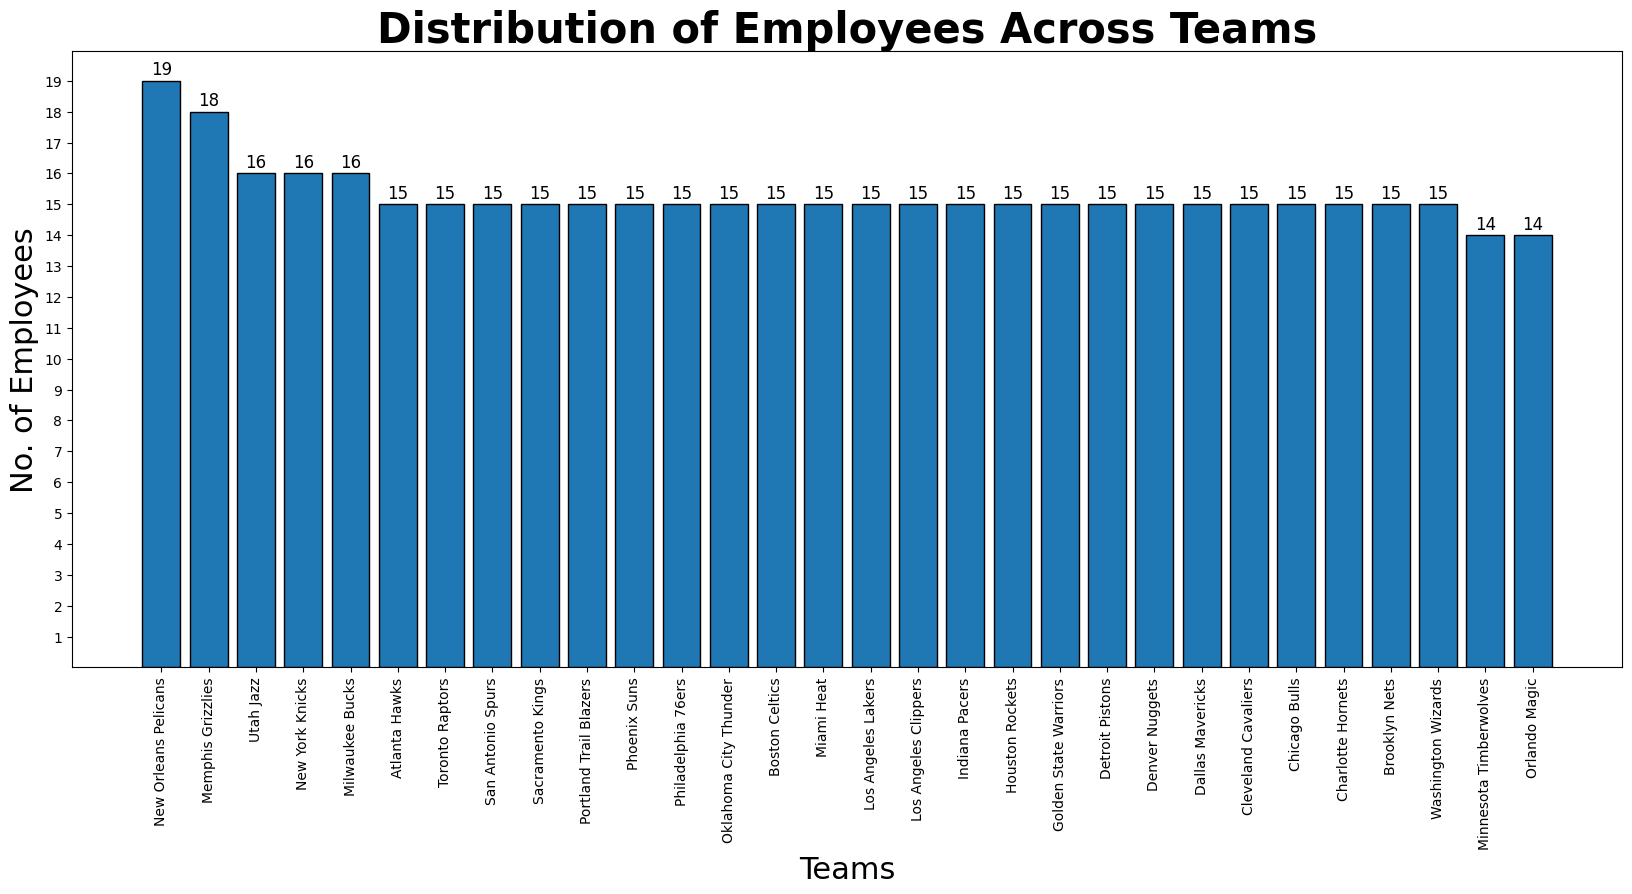

In [153]:
plt.figure(figsize=(20,8))
#plotting bar graph to explore distribution of employees across teams
plt.bar(emp_distribution.index,emp_distribution,edgecolor='k')
plt.xticks(rotation='vertical')
plt.yticks(list(range(1,20,1)))
fonts={"family":"sans","size":22}
plt.xlabel("Teams",fontdict=fonts)
plt.ylabel("No. of Employees",fontdict=fonts)
plt.title("Distribution of Employees Across Teams",fontsize=30,fontweight="bold")
for bar, value in enumerate(emp_distribution):
    plt.text(bar, value + 0.2, str(value), ha='center', va='baseline',fontsize=12)
plt.show()

In [154]:
team_perc = (emp_distribution / df.shape[0]) * 100
team_perc=team_perc.sort_values(ascending=False)
print('Team-wise percentage split of employees\n\n',team_perc)

Team-wise percentage split of employees

 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Indiana Pacers            3.275109
Washington Wizards        3.275109
Brooklyn Nets             3.275109
Charlotte Hornets         3.275109
Chicago Bulls             3.275109
Cleveland Cavaliers       3.275109
Dallas Mavericks          3.275109
Denver Nuggets            3.275109
Detroit Pistons           3.275109
Golden State Warriors     3.275109
Houston Rockets           3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Miami Heat                3.275109
Boston Celtics            3.275109
Oklahoma City Thunder     3.275109
Philadelphia 76ers        3.275109
Phoenix Suns              3.275109
Portland Trail Blazers    3.275109
Sacramento Kings          3.275109
San Antonio Spurs         3.275109
Toronto Raptors           3.275109
Atlanta 

#### <h2>INSIGHTS:</h2> <b>'New Orleans Pelicans' with 19 employees, have the highest number of employees among the 30 teams listed. Most teams have 15 employees which might be the  standard team employee intake in 'ABC' company.</b>

### Task 2. Segregate employees based on their positions within the company.

In [155]:
positions=df['Position'].unique()
print(f'Positions at ABC company are: {positions}')

Positions at ABC company are: ['PG' 'SF' 'SG' 'PF' 'C']


In [156]:
pos_wise_distribution=df.groupby('Position')['Name'].count().sort_values(ascending=False)
print('Position-wise distribution of employees\n\n',pos_wise_distribution)

Position-wise distribution of employees

 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: Name, dtype: int64


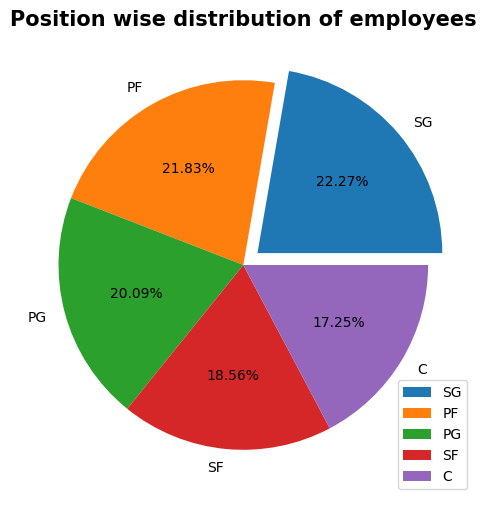

In [157]:
plt.figure(figsize=(6,6))
explode_list=[0.1,0,0,0,0]
plt.pie(pos_wise_distribution,labels=pos_wise_distribution.index,autopct='%1.2f%%',explode=explode_list)
plt.title("Position wise distribution of employees",fontsize=15,fontweight="bold")
plt.legend(loc=4)
plt.show()

#### <h2>INSIGHTS:</h2> <b>The data indicates that 'ABC' company has substantial number of employees in SG and PF positions and a balanced employee count in other positions. Further analysis can be done on gaining clarity on positions and their role in the company.</b>

### Task 3. Identify the predominant age group among employees.

In [158]:
print(df['Age'].min(),df['Age'].max())

19 40


In [159]:
age_groups = pd.cut(df['Age'], bins=[10,20,30,40], labels=['10-20', '20-30', '30-40']) #seperating array elements to seperate bins
print(age_groups.value_counts())
age_group_distribution = age_groups.value_counts().sort_values(ascending=True)

Age
20-30    346
30-40     91
10-20     21
Name: count, dtype: int64


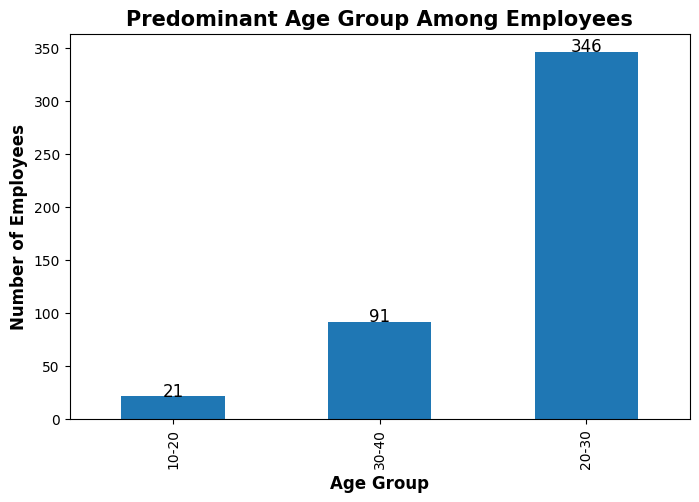

In [160]:
plt.figure(figsize=(8,5))
age_group_distribution.plot(kind='bar')
for bar, value in enumerate(age_group_distribution):
    plt.text(bar, value + 0.4, str(value), ha='center', va='baseline',fontsize=12)
plt.title('Predominant Age Group Among Employees',fontsize=15,fontweight="bold")
plt.xlabel('Age Group',fontsize=12,fontweight="bold")
plt.ylabel('Number of Employees',fontsize=12,fontweight="bold")
plt.show()

#### <h2>INSIGHTS:</h2> <b>Employees aged between 20-30 years form the largest age group(approx 75%), indicating a relatively young workforce.</b>

### Task 4. Discover which team and position have the highest salary expenditure.

In [161]:
team_wise_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print("Team Wise Salary Expenditure (largest to smallest)\n\n",team_wise_salary)

Team Wise Salary Expenditure (largest to smallest)

 Team
Cleveland Cavaliers       1.146307e+08
Memphis Grizzlies         9.842256e+07
Miami Heat                9.521039e+07
Los Angeles Clippers      9.485464e+07
Oklahoma City Thunder     9.376530e+07
Golden State Warriors     8.886900e+07
Chicago Bulls             8.678338e+07
San Antonio Spurs         8.444273e+07
New Orleans Pelicans      8.275077e+07
Charlotte Hornets         7.834092e+07
Washington Wizards        7.632864e+07
Houston Rockets           7.528302e+07
New York Knicks           7.330390e+07
Atlanta Hawks             7.290295e+07
Los Angeles Lakers        7.177043e+07
Sacramento Kings          7.168367e+07
Dallas Mavericks          7.119873e+07
Toronto Raptors           7.111761e+07
Milwaukee Bucks           6.960352e+07
Detroit Pistons           6.716826e+07
Indiana Pacers            6.675183e+07
Denver Nuggets            6.441635e+07
Minnesota Timberwolves    6.430275e+07
Utah Jazz                 6.400737e+07
Phoeni

Team Cleveland Cavaliers has the highest salary expenditure (sums up to 114630738.21428572)



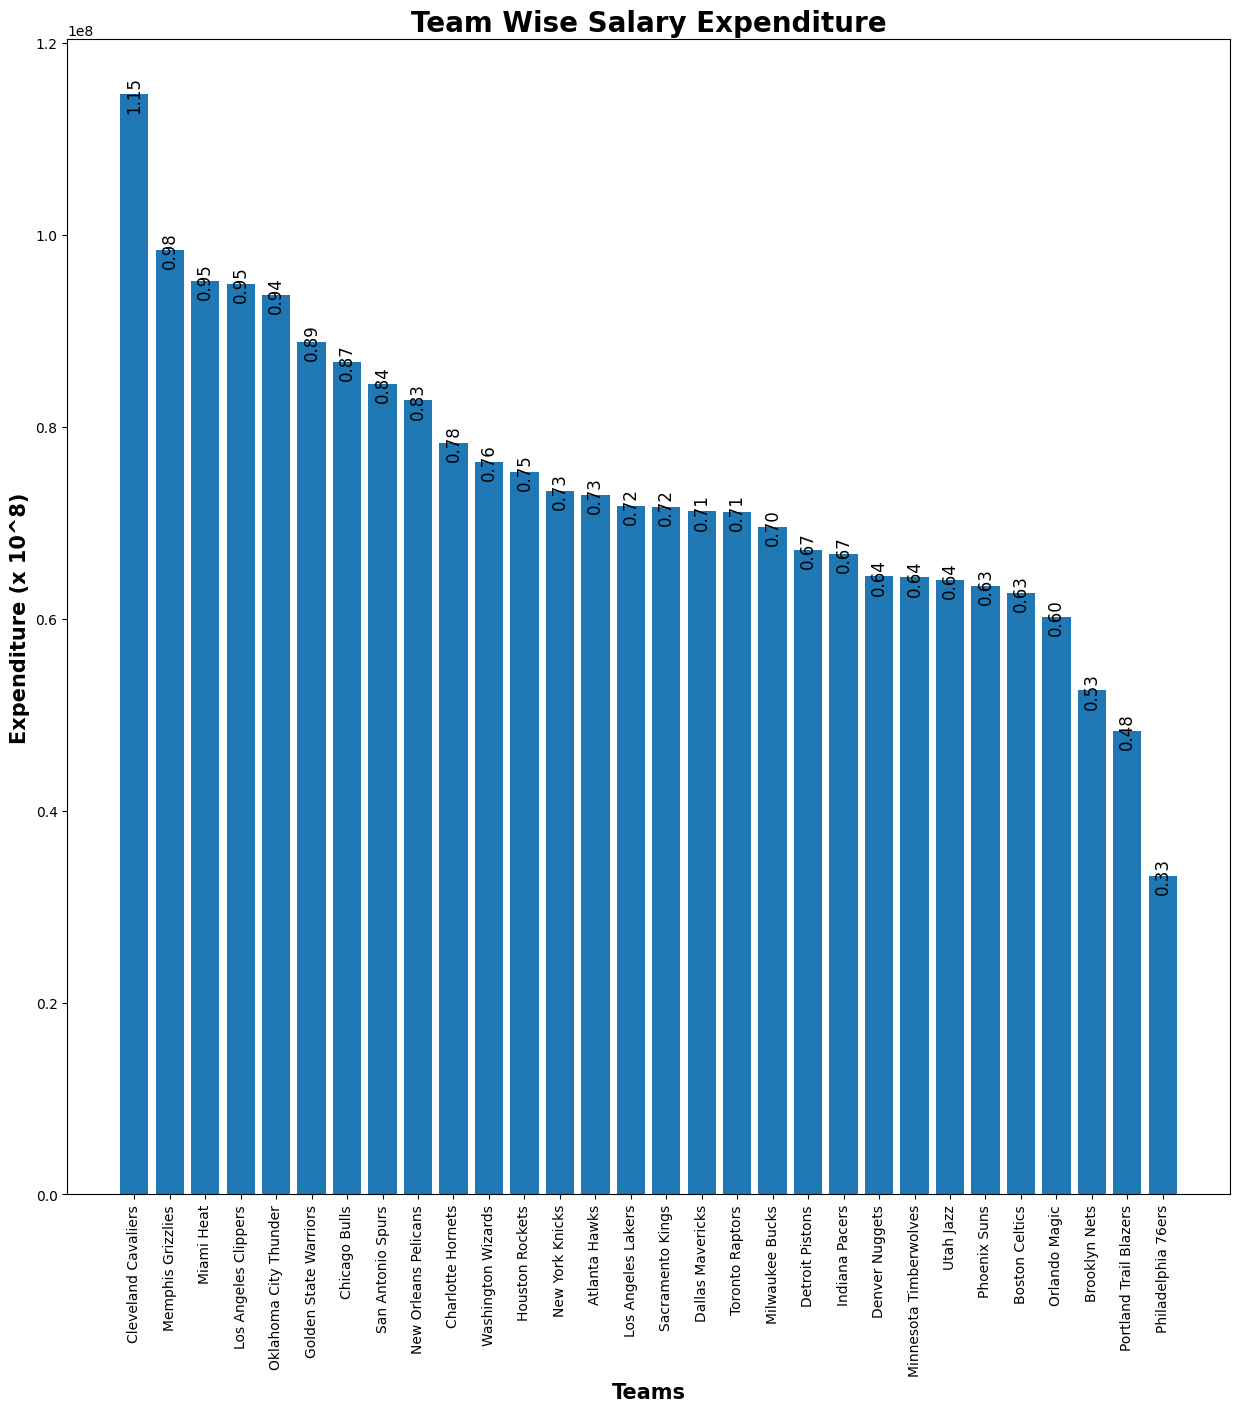

In [162]:
print(f'Team {team_wise_salary.idxmax()} has the highest salary expenditure (sums up to {team_wise_salary.max()})\n')

plt.figure(figsize=(15,15))
plt.bar(team_wise_salary.index,team_wise_salary)
plt.title("Team Wise Salary Expenditure",fontsize=20,fontweight="bold")
plt.xlabel("Teams",fontsize=15,fontweight="bold")
plt.ylabel("Expenditure (x 10^8)",fontsize=15,fontweight="bold")
plt.xticks(rotation='vertical')
for bar, value in enumerate(team_wise_salary):
    plt.text(bar, value+0.1, f"{value/(10**8):.2f}", ha='center', va='center',fontsize=12,rotation='vertical')
plt.show()

In [163]:
posn_wise_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print("Position Wise Salary Expenditure (largest to smallest)\n\n",posn_wise_salary)

Position Wise Salary Expenditure (largest to smallest)

 Position
PG    4.696001e+08
C     4.663773e+08
PF    4.548356e+08
SF    4.143683e+08
SG    4.130942e+08
Name: Salary, dtype: float64


The employees holding PG position has the highest salary expenditure (sum up to 469600090.46153843)



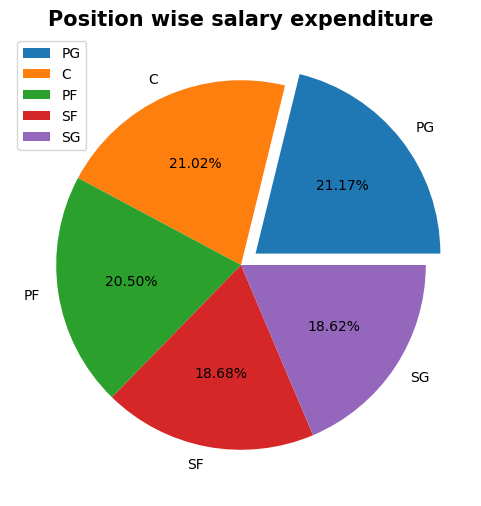

In [164]:
print(f'The employees holding {posn_wise_salary.idxmax()} position has the highest salary expenditure (sum up to {posn_wise_salary.max()})\n')

plt.figure(figsize=(6,6))
explode_list=[0.1,0,0,0,0]
plt.pie(posn_wise_salary,labels=posn_wise_salary.index,autopct='%1.2f%%',explode=explode_list)
plt.title("Position wise salary expenditure",fontsize=15,fontweight="bold")
plt.legend(loc=0)
plt.show()

In [165]:
temp_df = df.loc[df['Team'] =='Cleveland Cavaliers']
print(temp_df['Position'].value_counts())
print(temp_df['Age'].value_counts())

Position
SG    5
PG    3
C     3
PF    2
SF    2
Name: count, dtype: int64
Age
25    4
35    3
33    2
31    2
24    1
27    1
29    1
30    1
Name: count, dtype: int64


#### <h2>INSIGHTS:</h2> 
<b>
 <ul>
     <li>The Cleveland Cavaliers have the highest salary expenditure even though the head count of 15 is standard across teams.</li>
     <li>Further analysis on correlation between various attributes influencing salary may shed some light on the reason.</li>
     <li>Compared to other positions, a relatively larger percentage of the salary expenditure goes to employees holding the position of 'PG'.</li>
 </ul> 
</b>

### Task 5. Investigate if there's any correlation between age and salary, and represent it visually.

             Age    Salary
Age     1.000000  0.210575
Salary  0.210575  1.000000


<Axes: >

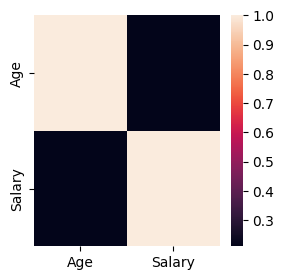

In [166]:
age_sal_df=df[['Age','Salary']]
correlation = age_sal_df.corr()
print(correlation)
plt.figure(figsize=(3,3))
sns.heatmap(correlation)

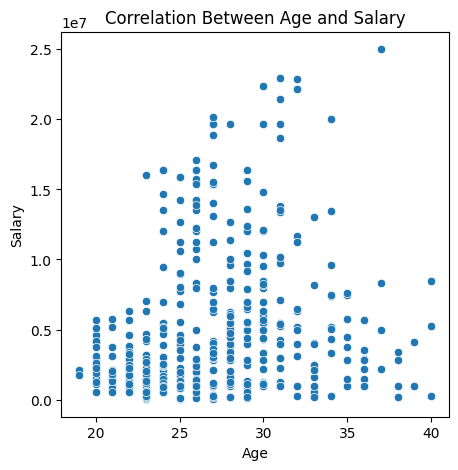

In [167]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

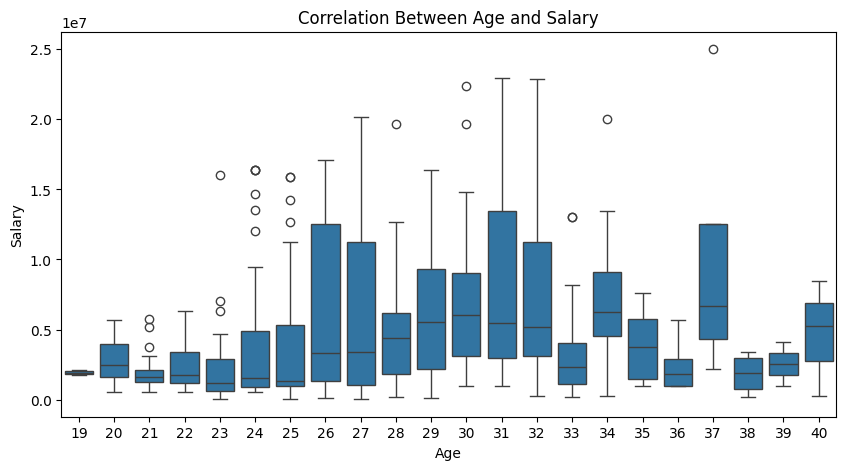

In [168]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y='Salary')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

##### <h2>INSIGHTS:</h2>
<b>
 <ul>
     <li>The analysis indicates a weak positive correlation between Age and Salary</li>
     <li>The value 0.210575 means that, generally, as Age increases, Salary tends to increase as well, but the relationship is not strong.</li>
     <li>Salaries tend to be higher around the age range of 25-35.</li>
     <li>Beyond the age of 35, high salaries become less common.</li>
     <li>There are some outliers  around the age of 20-25 these may be the employees holding key positions.</li>
 </ul>
</b>